### Time Series in python 4



c:\python 3.9\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
c:\python 3.9\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


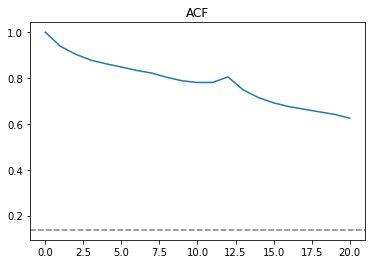

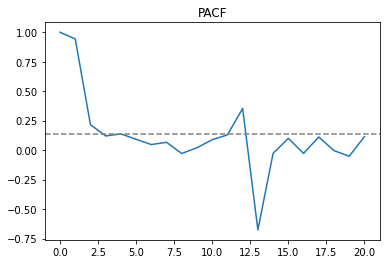

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dateutil.parser import parse
from scipy import signal
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
df =  pd.read_csv('time.csv',parse_dates=['date'],index_col='date')
lag_acf = acf(df,nlags=25)
lag_pacf = pacf(df,nlags=25)

#plt.subplot(121)
#plt.plot(lag_acf)
#plt.title("ACF")
#plt.subplot(122)
#plt.plot(lag_pacf)
#plt.title("PACF")

df_log = np.log(df)
df_log_diff = df_log - df_log.shift()
df_log_diff_2 = df_log_diff - df_log_diff.shift()

df_log_diff_2.head()

df_log.dropna(inplace=True)
lag_acf = acf(df_log,nlags=20)
plt.plot(lag_acf)
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_2)),linestyle='--', color='gray')
#Confidence intercept will give the value of q for ACF
plt.title("ACF")
plt.show()

lag_pacf = pacf(df_log,nlags=20)
plt.plot(lag_pacf)
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_2)),linestyle='--', color='gray')
#Confidence intercept will give the value of q for ACF
plt.title("PACF")
plt.show()

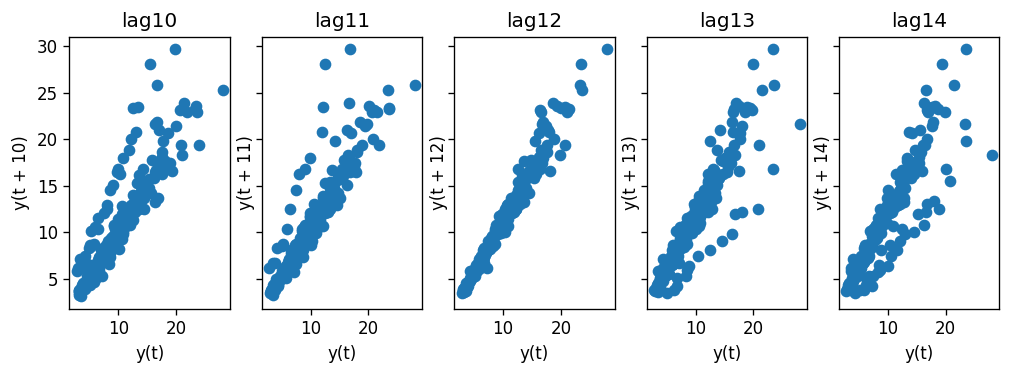

In [2]:
#Lag Plots
from pandas.plotting import lag_plot

fig, axe = plt.subplots(1,5,figsize=(10,3),sharex = True, sharey = True, dpi = 120)
for i,ax in enumerate(axe.flatten()[:5]):
    lag_plot(df.value,lag=i+10,ax=ax)
    ax.set_title("lag"+str(i+10))
plt.show()


c:\python 3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\python 3.9\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


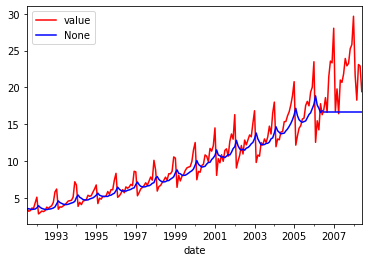

In [3]:
from statsmodels.tsa.api import SimpleExpSmoothing

train = df[:'2006-06-01']
test = df['2006-06-01':]
predict_values = len(df)-len(df[:'2006-06-01'])
predict_values
fit =  SimpleExpSmoothing(train).fit(smoothing_level=0.2,optimized=False)
df.plot(color="red",legend=True)
fore = fit.forecast(predict_values)
fore.plot(color='blue',legend=True)
fit.fittedvalues.plot(color='blue')
plt.show()